In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [90]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# KMeans clustering

In [91]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [92]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [93]:
df['clusters'] = y_pred
df

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


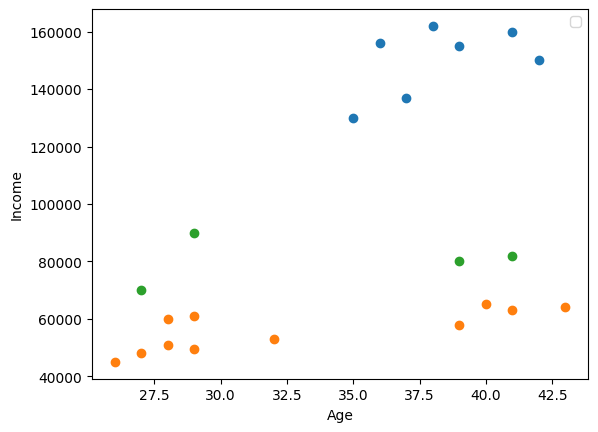

In [94]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2['Age'],df2['Income($)'])
plt.scatter(df3['Age'],df3['Income($)'])

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [95]:
## the Clusters are not maped properly because of the y axis ranges very high as compare to x axis 

##  So we will do some preprocessing and use MinMaxScaler for this

In [96]:
sc = MinMaxScaler()
sc.fit(df[['Income($)']])
df[['Income($)']] = sc.transform(df[['Income($)']])
df

,Name,Age,Income($),clusters
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [97]:
sc.fit(df[['Age']])
df[['Age']] = sc.transform(df[['Age']])
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


# Train With Transformed Data and New Clusters

In [98]:
km1 = KMeans(n_clusters  = 3)
km1

KMeans(n_clusters=3)

In [99]:
y_predicted = km1.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

# New Cluster Table

In [100]:
df['cluster'] = y_predicted
df.drop(['clusters'],axis = 'columns',inplace = True)

# Graph with new cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


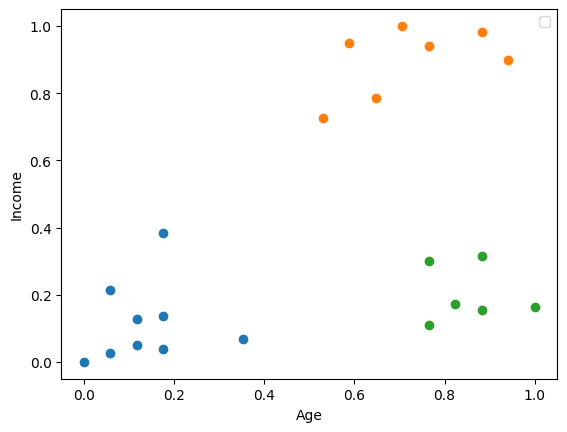

In [102]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2['Age'],df2['Income($)'])
plt.scatter(df3['Age'],df3['Income($)'])

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

# Centroid

In [107]:
km1.cluster_centers_




array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

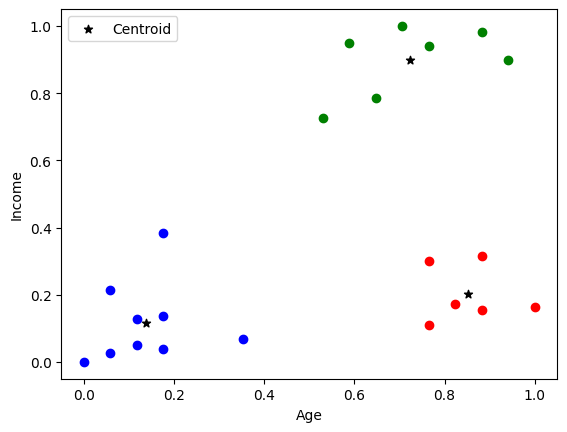

In [111]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'blue')
plt.scatter(df2.Age,df2['Income($)'], color = 'green')
plt.scatter(df3.Age,df3['Income($)'], color = 'red')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color = 'black' , marker = '*',label = "Centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

# Elbow Method
       #when we have the Large data then finding the cluster numbers will be dificult so we use this

In [120]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km2 = KMeans(n_clusters = k)
    km2.fit(df[['Age','Income($)']])
    sse.append(km2.inertia_)

In [121]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2829404587160481,
 0.2695109073804029,
 0.19234897613331944,
 0.13717729016208896,
 0.11612804668175383]

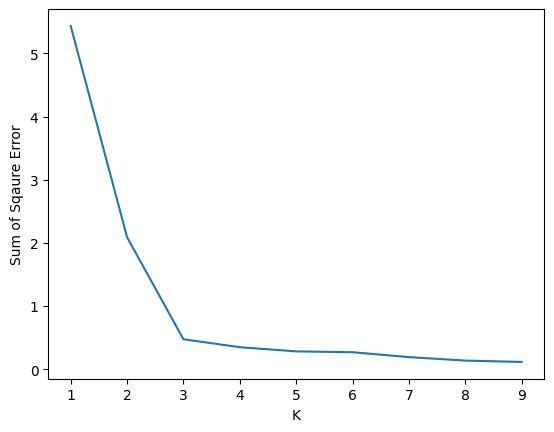

In [122]:
plt.xlabel('K')
plt.ylabel('Sum of Sqaure Error')
plt.plot(k_rng,sse)